In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import urllib
import requests
import seaborn as sns
from nltk.corpus import stopwords

In [ ]:
# Authentication
consumer_Key = "YjpUMq8F0Vc15DrmDT1dVNHYO"
consumer_Secret = "hqqKizfetGcQGDziLVHguaBRMKqujnC98GRzp4BaVWIy2YdtQi"
access_Token = "2821184361-nI4ZUrqAhJ3bQq0e15rUuFMXbHTK3VuJvIoVWHp"
accessToken_Secret = "ltXVMn0Iqn7GJnJwFXUDDIxgB7Zw4ne0uL8B1qzlcjj47"

auth = tweepy.OAuthHandler(consumer_Key, consumer_Secret)
auth.set_access_token(access_Token, accessToken_Secret)
api = tweepy.API(auth)

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Sentiment Analysis

def Analyser(part,whole):
    return 100 * float(part)/float(whole)

HANDLES = input("ENTER ANY TWITTER HANDLES OR HASETAGE: ")
TOTAL_TWEETS = int(input ("ENTER NUMBER FOR ANALYSIS THE TWEETS: "))


find = tweepy.Cursor(api.search, q=HANDLES).items(TOTAL_TWEETS)
positive  = 0
negative = 0
neutral = 0
polarity = 0
ALL_TWEETS = []
ALL_NEUTRAL = []
ALL_NEGATIVE = []
ALL_POSITIVE = []

for tweet in find:

    #print(tweet.text)
    ALL_TWEETS.append(tweet.text)
    SERACH_TWEETS = TextBlob(tweet.text)
    TWEEPY = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    NEGATIVE_TWEETS = TWEEPY['neg']
    NEUTRAL_TWEETS = TWEEPY['neu']
    POSITIVE_TWEETS = TWEEPY['pos']
    COMPOUND = TWEEPY['compound']
    polarity += SERACH_TWEETS.sentiment.polarity

    if NEGATIVE_TWEETS > POSITIVE_TWEETS:
        ALL_NEGATIVE.append(tweet.text)
        negative += 1

    elif POSITIVE_TWEETS > NEGATIVE_TWEETS:
        ALL_POSITIVE.append(tweet.text)
        positive += 1

    elif POSITIVE_TWEETS == NEGATIVE_TWEETS:
        ALL_NEUTRAL.append(tweet.text)
        neutral += 1

positive = Analyser(positive, TOTAL_TWEETS)
negative = Analyser(negative, TOTAL_TWEETS)
neutral = Analyser(neutral, TOTAL_TWEETS)
polarity = Analyser(polarity, TOTAL_TWEETS)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

ENTER ANY TWITTER HANDLES OR HASETAGE: #btsv
ENTER NUMBER FOR ANALYSIS THE TWEETS: 100


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
ALL_TWEETS = pd.DataFrame(ALL_TWEETS)
ALL_NEUTRAL = pd.DataFrame(ALL_NEUTRAL)
ALL_NEGATIVE = pd.DataFrame(ALL_NEGATIVE)
ALL_POSITIVE = pd.DataFrame(ALL_POSITIVE)
print("TOTAL TWEETS: ",len(ALL_TWEETS))
print("TOTAL POSITIVE TWEETS: ",len(ALL_POSITIVE))
print("TOTAL NEGATIVE TWEETS: ", len(ALL_NEGATIVE))
print("TOTAL NEUTRAL TWEETS: ",len(ALL_NEUTRAL))

TOTAL TWEETS:  100
TOTAL POSITIVE TWEETS:  31
TOTAL NEGATIVE TWEETS:  6
TOTAL NEUTRAL TWEETS:  63


In [ ]:
ALL_TWEETS

,0
0,RT @isabelc40847741: Cómo no enamorarme de ti;...
1,RT @danmee17: 「私の推しは星5つ！」12月 Danmeeトップ韓国男性芸能人決...
2,"RT @Shin1230V: 뷔, 방탄소년단 화보 프로젝트 다섯 번째 주자 (출처 :..."
3,RT @borahe777: 仁川国際空港で素敵なテテのバースデー広告が見れました💜🐻\nT...
4,V's Brand Reputation [12.09 KST] [Add some wor...
...,...
95,RT @Hello_omagic: อันนี้คือต้องจ้างก่อนมั้ย ถ้...
96,RT @v_hotrends: ETHEREAL BEAUTY ICON KIM TAEHY...
97,RT @Hello_omagic: อันนี้คือต้องจ้างก่อนมั้ย ถ้...
98,RT @borabearkpop: #borabear_giftforyou 🎅🏻🎁 ˎˊ˗...


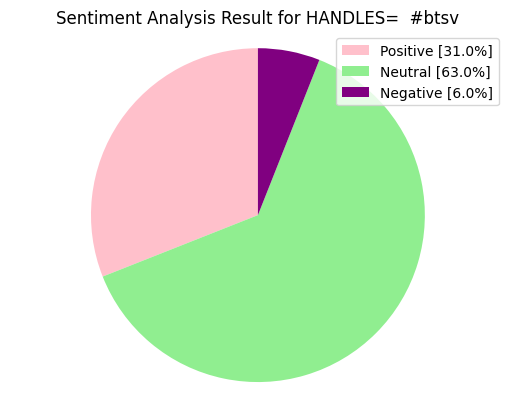

In [ ]:
#Creating PieCart

diagram = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
TAGS = [positive, neutral, negative]
colors = ['pink', 'lightgreen','purple']
patches, texts = plt.pie(TAGS,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(diagram)
plt.title("Sentiment Analysis Result for HANDLES=  "+HANDLES+"" )
plt.axis('equal')
plt.show()

In [ ]:
ALL_TWEETS.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
TWITTER_TWEETS = pd.DataFrame(ALL_TWEETS)
TWITTER_TWEETS["text"] = TWITTER_TWEETS[0]

#Removing RT, Punctuation etc
REMOVE = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
TWITTER_TWEETS["text"] = TWITTER_TWEETS.text.map(REMOVE).map(rt)
TWITTER_TWEETS["text"] = TWITTER_TWEETS.text.str.lower()
TWITTER_TWEETS.head(10)

,0,text
0,RT @isabelc40847741: Cómo no enamorarme de ti;...,c mo no enamorarme de ti si mi frio coraz n ...
1,RT @danmee17: 「私の推しは星5つ！」12月 Danmeeトップ韓国男性芸能人決...,5 12 danmee 14 ...
2,"RT @Shin1230V: 뷔, 방탄소년단 화보 프로젝트 다섯 번째 주자 (출처 :...",jtbc tv...
3,RT @borahe777: 仁川国際空港で素敵なテテのバースデー広告が見れました💜🐻\nT...,thanks nuna v ...
4,V's Brand Reputation [12.09 KST] [Add some wor...,v s brand reputation 12 09 kst add some wor...
5,RT @thv_625: ポジティブワードでテテ応援✨\n\nテテ 好き\nテテ 大好き\n...,...
6,RT @btslsedits: [#TAEHYUNG] LOCKSCREEN/WALLPAP...,taehyung lockscreen wallpaper hd edit by ...
7,RT @Shining_V1230: 태형시💜 플 일 \n저 오늘이 벌써 입덕한지 일 ...,...
8,RT @TaehyungCanada: It's been a long work day ...,it s been a long work day but i managed to pr...
10,"RT @BTSV_TH: Me, Myself, and V\n‘Veautiful Day...",me myself and v veautiful days special 8 ...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

TWITTER_TWEETS[['polarity', 'subjectivity']] = TWITTER_TWEETS['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in TWITTER_TWEETS['text'].iteritems():
    TWEEPY = SentimentIntensityAnalyzer().polarity_scores(row)
    NEGATIVE_TWEETS = TWEEPY['neg']
    NEUTRAL_TWEETS = TWEEPY['neu']
    POSITIVE_TWEETS = TWEEPY['pos']
    COMPOUND = TWEEPY['compound']
    if NEGATIVE_TWEETS > POSITIVE_TWEETS:
        TWITTER_TWEETS.loc[index, 'sentiment'] = "negative"
    elif POSITIVE_TWEETS > NEGATIVE_TWEETS:
        TWITTER_TWEETS.loc[index, 'sentiment'] = "positive"
    else:
        TWITTER_TWEETS.loc[index, 'sentiment'] = "neutral"
    TWITTER_TWEETS.loc[index, 'neg'] = NEGATIVE_TWEETS
    TWITTER_TWEETS.loc[index, 'neu'] = NEUTRAL_TWEETS
    TWITTER_TWEETS.loc[index, 'pos'] = POSITIVE_TWEETS
    TWITTER_TWEETS.loc[index, 'compound'] = COMPOUND

TWITTER_TWEETS.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @isabelc40847741: Cómo no enamorarme de ti;...,c mo no enamorarme de ti si mi frio coraz n ...,0.000000,0.000000,negative,0.104,0.896,0.000,-0.2960
1,RT @danmee17: 「私の推しは星5つ！」12月 Danmeeトップ韓国男性芸能人決...,5 12 danmee 14 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,"RT @Shin1230V: 뷔, 방탄소년단 화보 프로젝트 다섯 번째 주자 (출처 :...",jtbc tv...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @borahe777: 仁川国際空港で素敵なテテのバースデー広告が見れました💜🐻\nT...,thanks nuna v ...,0.200000,0.200000,positive,0.000,0.633,0.367,0.4404
4,V's Brand Reputation [12.09 KST] [Add some wor...,v s brand reputation 12 09 kst add some wor...,0.000000,0.000000,negative,0.320,0.680,0.000,-0.5719
5,RT @thv_625: ポジティブワードでテテ応援✨\n\nテテ 好き\nテテ 大好き\n...,...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @btslsedits: [#TAEHYUNG] LOCKSCREEN/WALLPAP...,taehyung lockscreen wallpaper hd edit by ...,0.000000,0.000000,positive,0.000,0.711,0.289,0.6908
7,RT @Shining_V1230: 태형시💜 플 일 \n저 오늘이 벌써 입덕한지 일 ...,...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @TaehyungCanada: It's been a long work day ...,it s been a long work day but i managed to pr...,-0.050000,0.400000,neutral,0.000,1.000,0.000,0.0000
10,"RT @BTSV_TH: Me, Myself, and V\n‘Veautiful Day...",me myself and v veautiful days special 8 ...,0.357143,0.571429,positive,0.000,0.769,0.231,0.4019


In [ ]:
# Set CSS properties for th elements in dataframe
A = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
B = [
  ('font-size', '11px')
  ]

C = [
  dict(selector="th", props=A),
  dict(selector="td", props=B)
  ]

# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("green", as_cmap=True)

(ALL_TWEETS.style
  .background_gradient(cmap=cm, subset=['pos','neg'])
  .highlight_max(subset=['pos','neg'])
  .set_caption('This is a custom caption.')
  .format({'total_amt_usd_pct_diff': "{:.10%}"})
  .set_table_styles(C))

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @isabelc40847741: Cómo no enamorarme de ti; si mi frio corazón se derrite cunado te veo I vote for #V (Kim Taehyung) #BTSV #KIMTAEHYUNG…,c mo no enamorarme de ti si mi frio coraz n se derrite cunado te veo i vote for v kim taehyung btsv kimtaehyung,0.000000,0.000000,negative,0.104000,0.896000,0.000000,-0.296000
1,RT @danmee17: 「私の推しは星5つ！」12月 Danmeeトップ韓国男性芸能人決定戦【候補14名】 ●期間：12月23日まで ●候補 #パク・ソジュン #BTSV #BTSJIMIN #チャン・グンソク #ユンホ #ソ・イングク #ジェジュン #ヨン…,5 12 danmee 14 12 23 btsv btsjimin,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
2,"RT @Shin1230V: 뷔, 방탄소년단 화보 프로젝트 다섯 번째 주자 (출처 : JTBC | 네이버 TV연예) VEAUTIFUL DAYS #VeautifuldaysbyV #BTSV I vote #KIMTAEHYUNG for Asian Ce…",jtbc tv veautiful days veautifuldaysbyv btsv i vote kimtaehyung for asian ce,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
3,RT @borahe777: 仁川国際空港で素敵なテテのバースデー広告が見れました💜🐻 Thanks NUNA V 💜@_nuna_V #BTSV #TAEHYUNG #2022HAPPYVDAY https://t.co/RZUDZqETGv,thanks nuna v nuna v btsv taehyung 2022happyvday,0.200000,0.200000,positive,0.000000,0.633000,0.367000,0.440400
4,V's Brand Reputation [12.09 KST] [Add some words to avoid spam] #V #뷔 #テテ キムテヒョン 金泰亨 방탄소년단 뷔 #방탄소년단뷔 #BTSV,v s brand reputation 12 09 kst add some words to avoid spam v btsv,0.000000,0.000000,negative,0.320000,0.680000,0.000000,-0.571900
5,RT @thv_625: ポジティブワードでテテ応援✨ テテ 好き テテ 大好き テテ 可愛い テテ 愛らしい テテ かっこいい テテ 笑顔 テテ 癒し テテ 素敵 テテ 最高 テテ ボラへ #WeLoveYouTaehyung #BTSV #KimTaehyung htt…,weloveyoutaehyung btsv kimtaehyung htt,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
6,RT @btslsedits: [#TAEHYUNG] LOCKSCREEN/WALLPAPER HD edit by btslsedits (1) save | like or rt #BTS #BTSV #BTSWALLPAPER #wallpaper #Wallpape…,taehyung lockscreen wallpaper hd edit by btslsedits 1 save like or rt bts btsv btswallpaper wallpaper wallpape,0.000000,0.000000,positive,0.000000,0.711000,0.289000,0.690800
7,RT @Shining_V1230: 태형시💜 플 일 저 오늘이 벌써 입덕한지 일 년 됐어요🥰 시간이 참 빠르네요.. 같은 화가를 좋아해서 이쁜 감성에 끌려서 입덕한건 태형이가 처음이라서 더 특별해요😍 태형아 앞으로 더 많은 시간 사랑할게😘🥰 #bt…,bt,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
8,RT @TaehyungCanada: It's been a long work day but I managed to pre-order #VeautifulDays #Photo_Folio and am now watching the concept film o…,it s been a long work day but i managed to pre order veautifuldays photo folio and am now watching the concept film o,-0.050000,0.400000,neutral,0.000000,1.000000,0.000000,0.000000
10,"RT @BTSV_TH: Me, Myself, and V ‘Veautiful Days’ Special 8 Photo-Folio Preview Photos 2 แอดฝากเข้าไปกดไลกภาพแทฮยองในไอจีตอรี่วงให้ด้วยน้า…",me myself and v veautiful days special 8 photo folio preview photos 2,0.357143,0.571429,positive,0.000000,0.769000,0.231000,0.401900


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

WORDCLOUD_NEGATIVE = TWITTER_TWEETS[TWITTER_TWEETS["sentiment"]=="negative"]
WORDCLOUD_POSITIVE = TWITTER_TWEETS[TWITTER_TWEETS["sentiment"]=="positive"]
WORDCLOUD_NEUTRAL = TWITTER_TWEETS[TWITTER_TWEETS["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def percentages(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    Analyser=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,Analyser],axis=1,keys=['Total','Analyser'])

In [ ]:
#Count_values for sentiment
percentages(TWITTER_TWEETS,"sentiment")

,Total,Analyser
neutral,46,67.65
positive,18,26.47
negative,4,5.88


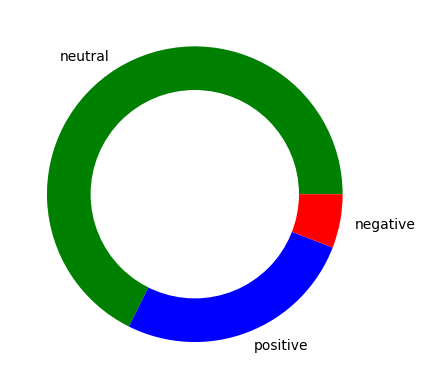

In [ ]:
# create data for Pie Chart
pi_chart = percentages(TWITTER_TWEETS,"sentiment")
names= pi_chart.index
size=pi_chart["Analyser"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def Wordcloud_Text(text):
    stopwords = set(STOPWORDS)

    # Generating images
    IMAGE = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

    GENERATE_IMAGE = WordCloud(background_color="lightblue", height=1500,width=4000,mask=IMAGE,

                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    GENERATE_IMAGE.generate(str(text))
    GENERATE_IMAGE.to_file("GENERATE_IMAGE.png")
    path="GENERATE_IMAGE.png"
    display(Image.open(path))

                                                                 ALL TEXT FROM TWITTER


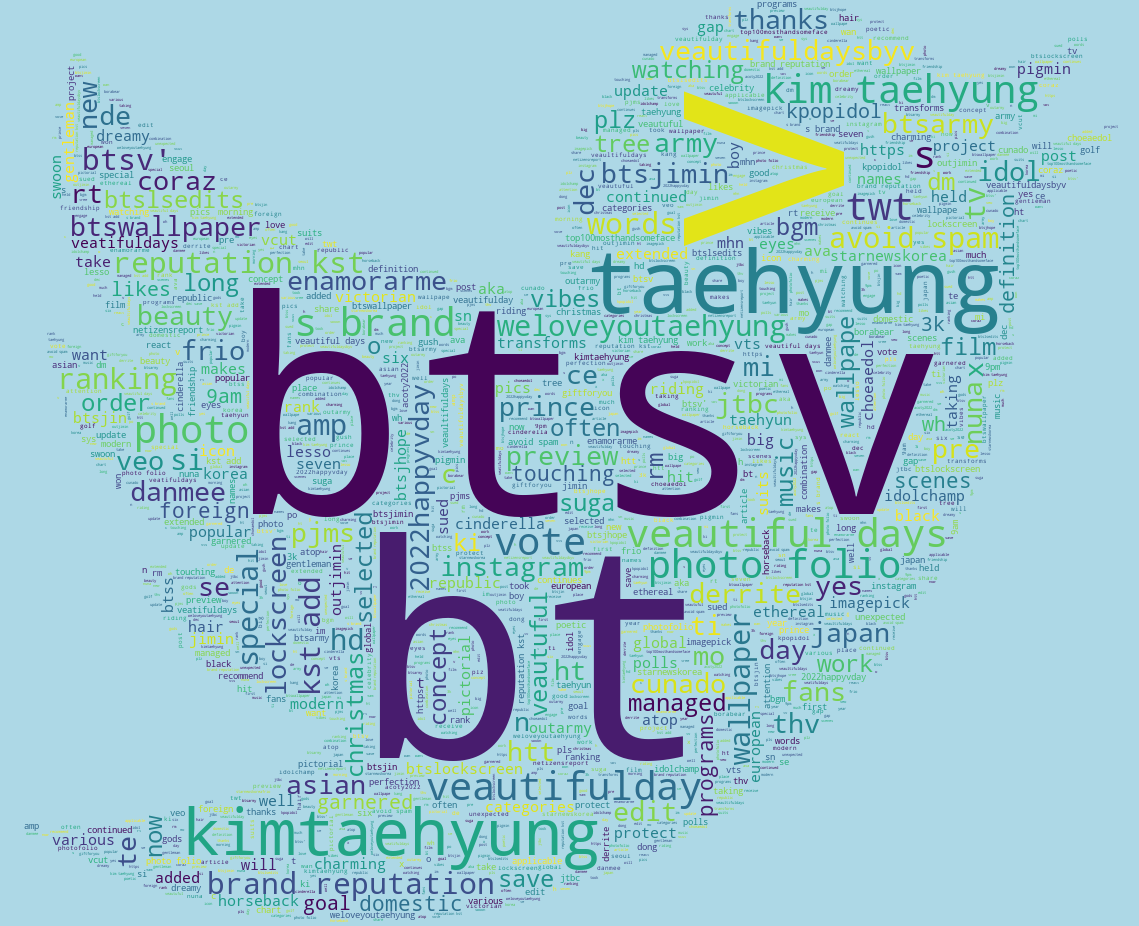

 IMAGE SAVED 


In [ ]:
#Creating wordcloud for all tweets

print("                                                                 ALL TEXT FROM TWITTER")
Wordcloud_Text(TWITTER_TWEETS["text"].values)

print(" IMAGE SAVED ")

                                                              ALL POSITIVE FROM TWITTER


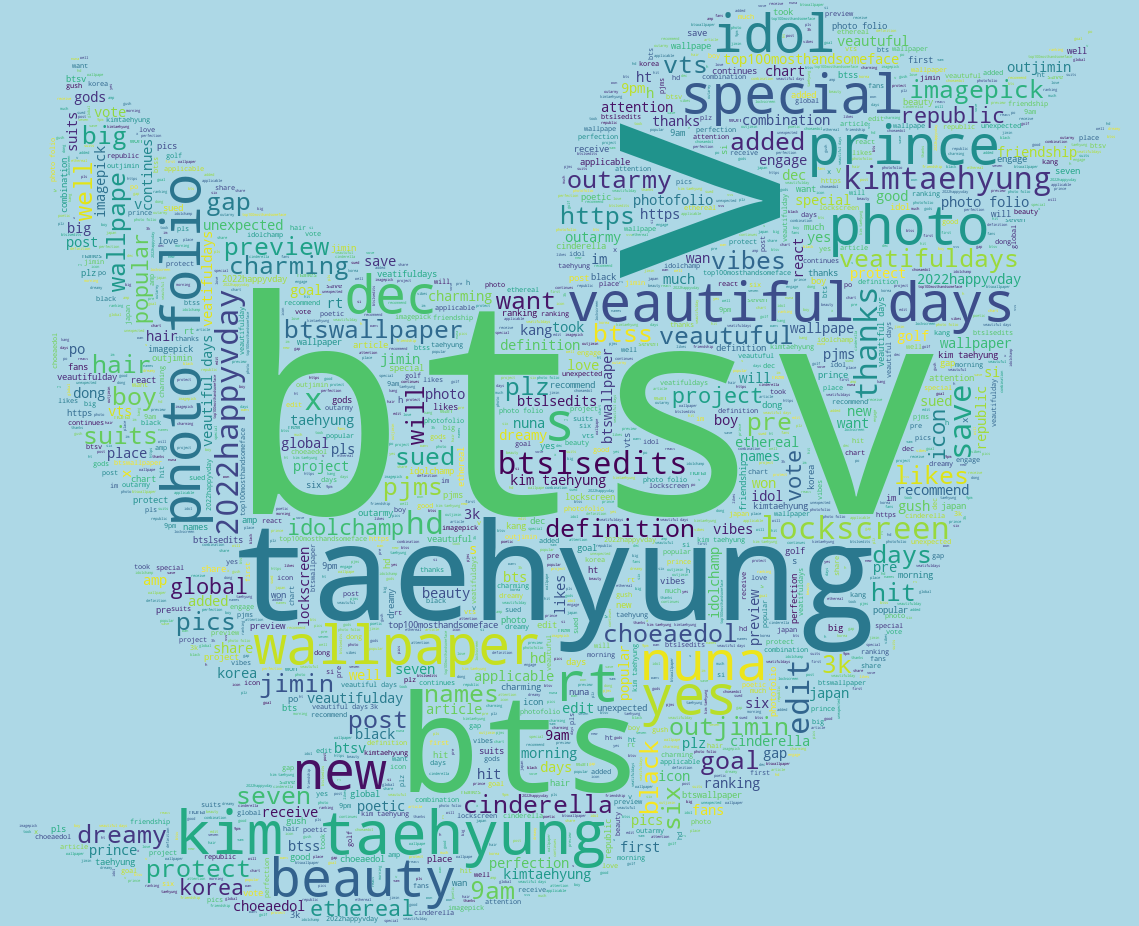

 IMAGE SAVED 


In [ ]:
#Creating wordcloud for positive sentiment

print("                                                              ALL POSITIVE FROM TWITTER")
Wordcloud_Text(WORDCLOUD_POSITIVE["text"].values)


print(" IMAGE SAVED ")

                                                              ALL NEGATIVE FROM TWITTER


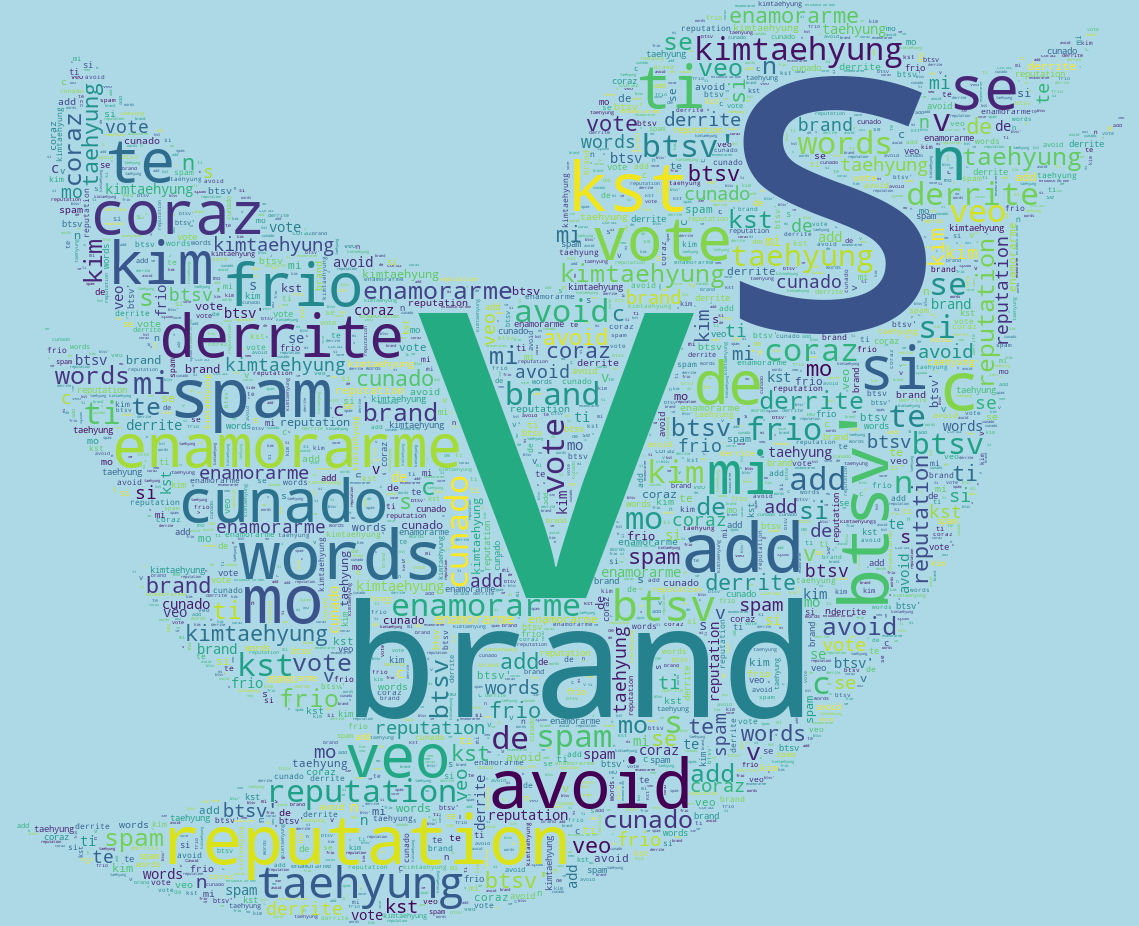

 IMAGE SAVED 


In [ ]:
#Creating wordcloud for negative sentiment
print("                                                              ALL NEGATIVE FROM TWITTER")
Wordcloud_Text(WORDCLOUD_NEGATIVE["text"].values)

print(" IMAGE SAVED ")

                                                               ALL NEUTRAL FROM TWITTER


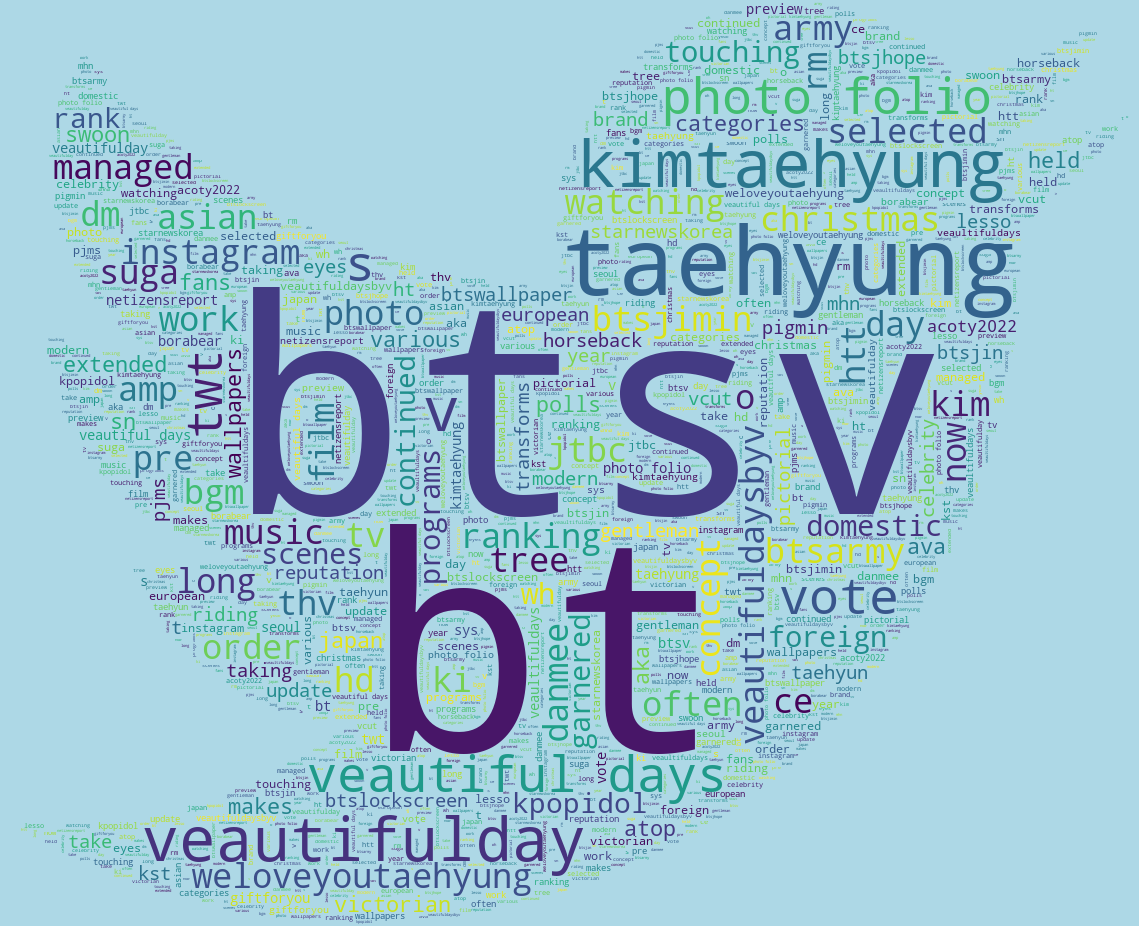

 IMAGE SAVED 


In [ ]:
#Creating wordcloud for neutral sentiment

print("                                                               ALL NEUTRAL FROM TWITTER")
Wordcloud_Text(WORDCLOUD_NEUTRAL["text"].values)

print(" IMAGE SAVED ")

In [ ]:
#Calculating tweet's lenght and word count
TWITTER_TWEETS['text_len'] = TWITTER_TWEETS['text'].astype(str).apply(len)
TWITTER_TWEETS['text_word_count'] = TWITTER_TWEETS['text'].apply(lambda x: len(str(x).split()))

In [ ]:
a=round(pd.DataFrame(TWITTER_TWEETS.groupby("sentiment").text_len.mean()),0)
a.style.set_properties(**{'background-color': 'red',
                           'color': 'white'})

,text_len
sentiment,
negative,110.000000
neutral,104.000000
positive,111.000000


In [ ]:
round(pd.DataFrame(TWITTER_TWEETS.groupby("sentiment").text_word_count.mean()),0)


,text_word_count
sentiment,
negative,17.0
neutral,7.0
positive,16.0


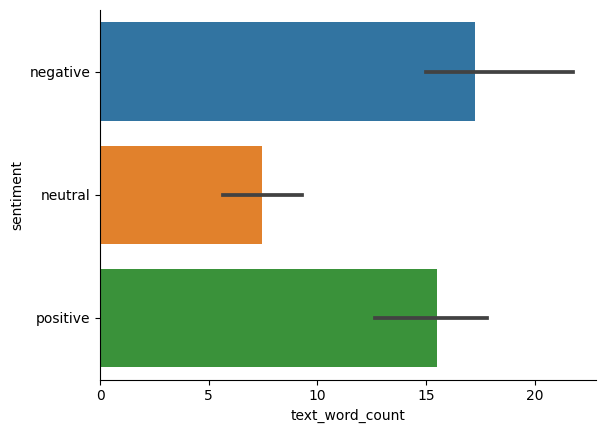

In [ ]:
sns.barplot(data=TWITTER_TWEETS,y='sentiment',x='text_word_count')
sns.despine()

In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

TWITTER_TWEETS['punct'] = TWITTER_TWEETS['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

TWITTER_TWEETS['punct'] = TWITTER_TWEETS['text'].apply(lambda x: remove_punct(x))

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
print(stopwords.words('english'))
ps = PorterStemmer()


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text

In [ ]:
TWITTER_TWEETS.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct
0,RT @isabelc40847741: Cómo no enamorarme de ti;...,c mo no enamorarme de ti si mi frio coraz n ...,0.0,0.0,negative,0.104,0.896,0.000,-0.2960,120,24,c mo no enamorarme de ti si mi frio coraz n ...
1,RT @danmee17: 「私の推しは星5つ！」12月 Danmeeトップ韓国男性芸能人決...,5 12 danmee 14 ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,127,8,danmee ...
2,"RT @Shin1230V: 뷔, 방탄소년단 화보 프로젝트 다섯 번째 주자 (출처 :...",jtbc tv...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,126,12,jtbc tv...
3,RT @borahe777: 仁川国際空港で素敵なテテのバースデー広告が見れました💜🐻\nT...,thanks nuna v ...,0.2,0.2,positive,0.000,0.633,0.367,0.4404,87,8,thanks nuna v ...
4,V's Brand Reputation [12.09 KST] [Add some wor...,v s brand reputation 12 09 kst add some wor...,0.0,0.0,negative,0.320,0.680,0.000,-0.5719,106,15,v s brand reputation kst add some words t...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

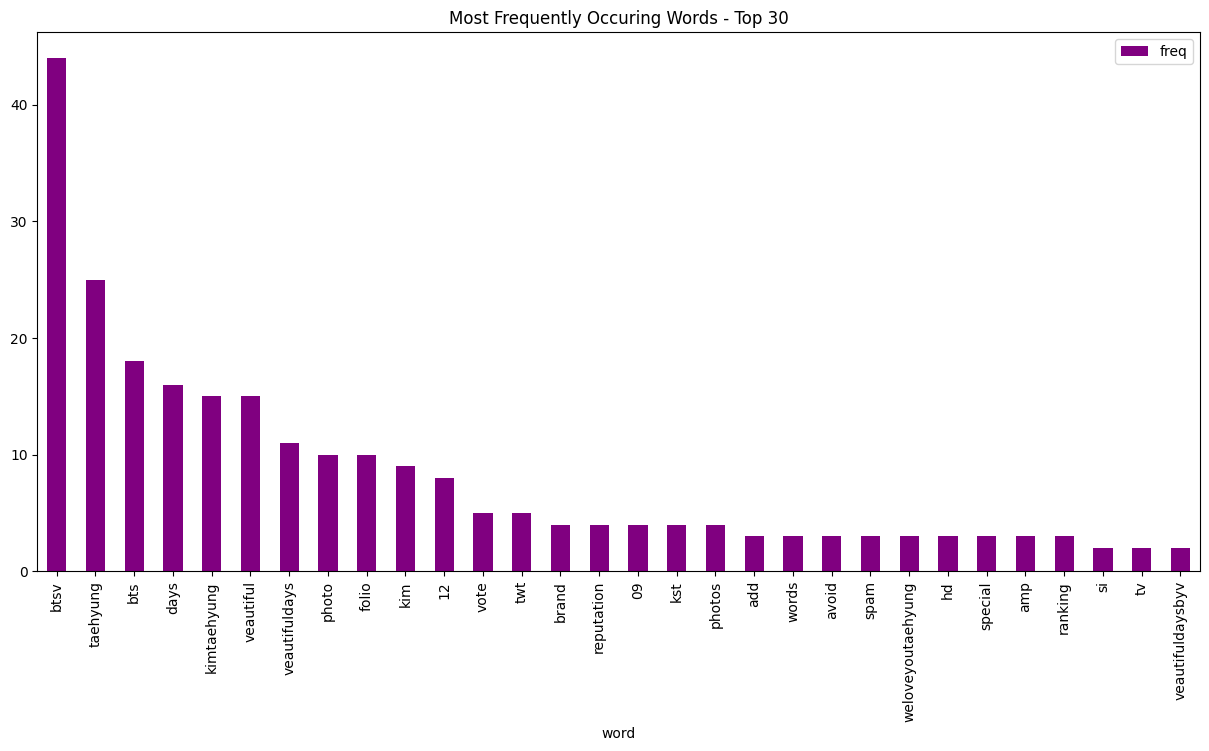

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(TWITTER_TWEETS['text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'purple')
plt.title("Most Frequently Occuring Words - Top 30")


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(TWITTER_TWEETS['text'],(2,2),20)

n2_bigrams

[('veautiful days', 15),
 ('photo folio', 10),
 ('kim taehyung', 9),
 ('btsv taehyung', 7),
 ('taehyung btsv', 6),
 ('btsv kimtaehyung', 5),
 ('brand reputation', 4),
 ('reputation 12', 4),
 ('12 09', 4),
 ('09 kst', 4),
 ('kimtaehyung btsv', 4),
 ('vote kimtaehyung', 3),
 ('kst add', 3),
 ('add words', 3),
 ('words avoid', 3),
 ('avoid spam', 3),
 ('spam btsv', 3),
 ('weloveyoutaehyung btsv', 3),
 ('bts btsv', 3),
 ('special photo', 3)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(TWITTER_TWEETS['text'],(3,3),20)

n3_trigrams

[('brand reputation 12', 4),
 ('reputation 12 09', 4),
 ('12 09 kst', 4),
 ('09 kst add', 3),
 ('kst add words', 3),
 ('add words avoid', 3),
 ('words avoid spam', 3),
 ('avoid spam btsv', 3),
 ('special photo folio', 3),
 ('vote kim taehyung', 2),
 ('kim taehyung btsv', 2),
 ('taehyung btsv kimtaehyung', 2),
 ('tv veautiful days', 2),
 ('veautiful days veautifuldaysbyv', 2),
 ('days veautifuldaysbyv btsv', 2),
 ('veautifuldaysbyv btsv vote', 2),
 ('btsv vote kimtaehyung', 2),
 ('vote kimtaehyung asian', 2),
 ('veautifuldays photo folio', 2),
 ('veautiful days special', 2)]

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = TWITTER_TWEETS['text'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(TWITTER_TWEETS['text']), epochs=20)

(3089, 13800)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

TWITTER_TWEETS['stopwords'] = TWITTER_TWEETS['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
TWITTER_TWEETS[['text','stopwords']].head()

,text,stopwords
0,c mo no enamorarme de ti si mi frio coraz n ...,3
1,5 12 danmee 14 ...,0
2,jtbc tv...,2
3,thanks nuna v ...,0
4,v s brand reputation 12 09 kst add some wor...,3


In [ ]:
#Applying bag of Words without N grams
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
tfidf = cv.fit_transform(TWITTER_TWEETS['text'])
tfidf.shape

(68, 297)

In [ ]:
print(cv.vocabulary_)

{'mo': 166, 'no': 178, 'enamorarme': 96, 'de': 87, 'ti': 252, 'si': 230, 'mi': 165, 'frio': 109, 'coraz': 82, 'se': 225, 'derrite': 90, 'cunado': 83, 'te': 246, 'veo': 272, 'vote': 275, 'for': 106, 'kim': 150, 'taehyung': 243, 'btsv': 64, 'kimtaehyung': 151, '12': 5, 'danmee': 84, '14': 8, '23': 18, 'btsjimin': 59, 'jtbc': 147, 'tv': 259, 'veautiful': 267, 'days': 86, 'veautifuldaysbyv': 270, 'asian': 40, 'ce': 71, 'thanks': 247, 'nuna': 180, '2022happyvday': 15, 'brand': 54, 'reputation': 219, '09': 2, 'kst': 154, 'add': 27, 'some': 233, 'words': 293, 'to': 253, 'avoid': 44, 'spam': 234, 'weloveyoutaehyung': 285, 'htt': 132, 'lockscreen': 158, 'wallpaper': 278, 'hd': 124, 'edit': 95, 'by': 67, 'btslsedits': 62, 'save': 223, 'like': 156, 'or': 185, 'rt': 222, 'bts': 56, 'btswallpaper': 65, 'wallpape': 277, 'bt': 55, 'it': 144, 'been': 47, 'long': 159, 'work': 294, 'day': 85, 'but': 66, 'managed': 162, 'pre': 207, 'order': 186, 'veautifuldays': 269, 'photo': 192, 'folio': 105, 'and': 34

In [ ]:
print(cv.get_feature_names()[109:200])

['frio', 'from', 'gap', 'garnered', 'gentleman', 'get', 'giftforyou', 'global', 'goal', 'gods', 'golf', 'good', 'gush', 'hair', 'has', 'hd', 'he', 'held', 'his', 'hit', 'horseback', 'how', 'ht', 'htt', 'http', 'https', 'icon', 'idol', 'idolchamp', 'im', 'imagepick', 'in', 'instagram', 'into', 'is', 'it', 'japan', 'jimin', 'jtbc', 'kang', 'ki', 'kim', 'kimtaehyung', 'korea', 'kpopidol', 'kst', 'lesso', 'like', 'likes', 'lockscreen', 'long', 'love', 'makes', 'managed', 'me', 'mhn', 'mi', 'mo', 'modern', 'more', 'morning', 'most', 'much', 'music', 'my', 'myself', 'names', 'netizensreport', 'new', 'no', 'now', 'nuna', 'of', 'off', 'often', 'on', 'or', 'order', 'other', 'outarmy', 'outjimin', 'over', 'perfection', 'photo', 'photofolio', 'photos', 'pics', 'pictorial', 'pigmin', 'pjms', 'place']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}